## EDA

## To study and apply Data Preprocessing techniques on given dataset. Prepare a titanic dataset for training with machine learning algorithm by applying suitable data preprocessing techniques. Perform basic EDA using functions like head(), tail(), describe(), shape.


1.Identify & handle missing value.

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:

titanic_df = pd.read_csv('E:/Downloads/titanic - titanic.csv')
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [55]:
print(titanic_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [56]:
print(titanic_df.shape)

(891, 12)


In [57]:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [58]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True) 
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True) 
titanic_df.drop(columns=['Cabin'], inplace=True) 


2.Check for duplicates and handle it.


In [59]:
print(titanic_df.duplicated().sum())
titanic_df.drop_duplicates(inplace=True)

0


3. Identify outliers & handle it.

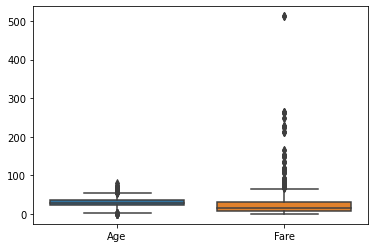

<Figure size 864x648 with 0 Axes>

In [60]:
numerical_columns = ['Age', 'Fare'] 
sns.boxplot(data=titanic_df[numerical_columns])
plt.figure(figsize=(12, 9))
plt.show()




Outliers in Age before handling: [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]
Outliers in Fare before handling: [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 

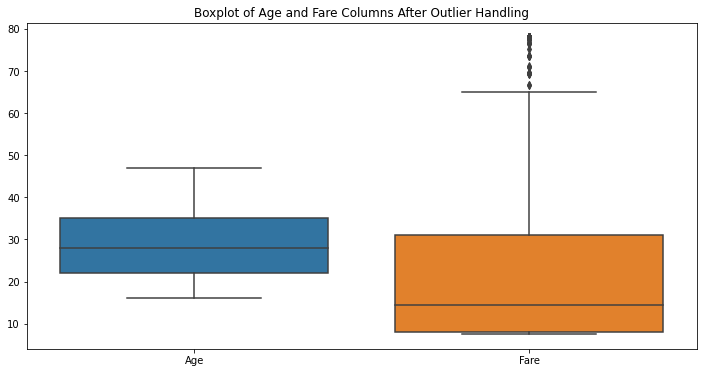

In [61]:

def detect_outliers_iqr(data):
    outlier_list = []
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outlier_list.append(i)
    
    return outlier_list

# Function to handle outliers using quantile-based flooring and capping
def handle_outliers(data):
    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    # Floor values below the 10th percentile
    data_floored = np.where(data < tenth_percentile, tenth_percentile, data)

    # Cap values above the 90th percentile
    data_capped = np.where(data_floored > ninetieth_percentile, ninetieth_percentile, data_floored)

    return data_capped

# Columns of interest for outlier detection and handling
columns = ['Age', 'Fare']

# Detecting and printing outliers for each selected column
for col in columns:
    outliers = detect_outliers_iqr(titanic_df[col].dropna())  # dropna() to handle missing values
    print(f"Outliers in {col} before handling: {outliers}")

# Handling outliers by capping and flooring using the updated handle_outliers function
for col in columns:
    titanic_df[col] = handle_outliers(titanic_df[col].dropna())  # dropna() to handle missing values

# Verify the outlier handling with boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_df[columns])
plt.title('Boxplot of Age and Fare Columns After Outlier Handling')
plt.show()

4.Apply data encoding technique on suitable attribute.

In [63]:
titanic_df_encoded = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

print(titanic_df_encoded.head())


print(titanic_df_encoded.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.5500         1           0           1  
1          PC 17599  71.2833         0           0           0  
2  STON/O2. 3101282   7.9250         0           0           1  
3            113803  53.1000         0           0           1  
4

5.Apply Univariate, Bivariate & Multivariate analysis·   

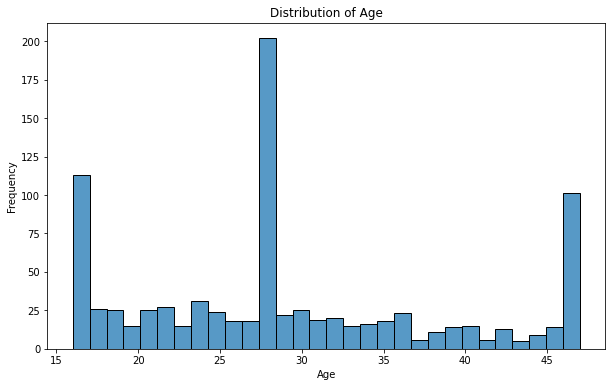

In [64]:
# Univariate analysis on 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'].dropna(), bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

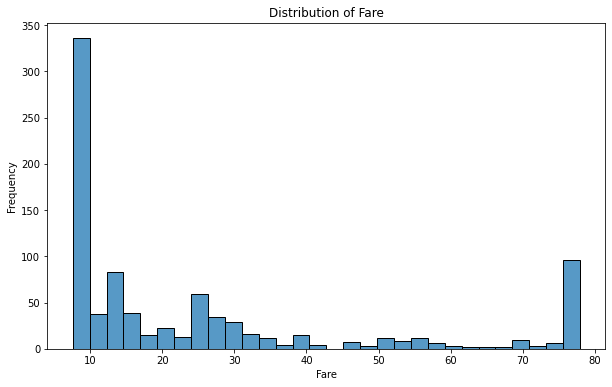

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Fare'].dropna(), bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

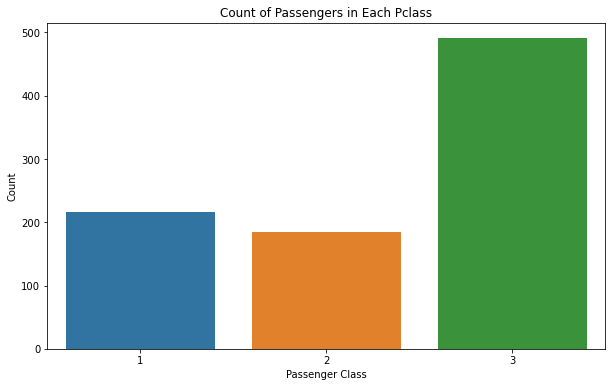

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Count of Passengers in Each Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

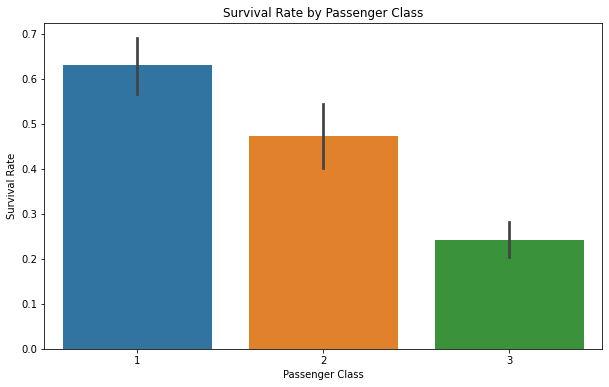

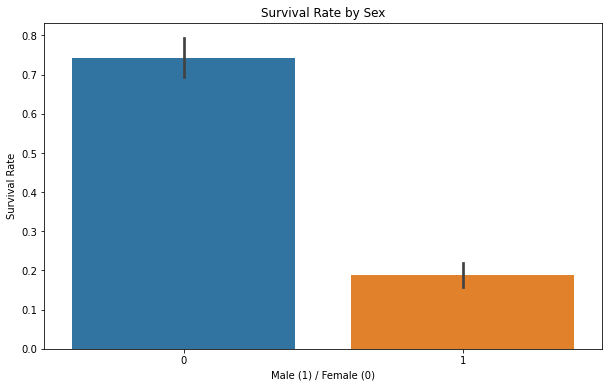

In [67]:


# Bivariate analysis: Pclass vs Survived
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Bivariate analysis: Sex vs Survived
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex_male', y='Survived', data=titanic_df_encoded)
plt.title('Survival Rate by Sex')
plt.xlabel('Male (1) / Female (0)')
plt.ylabel('Survival Rate')
plt.show()

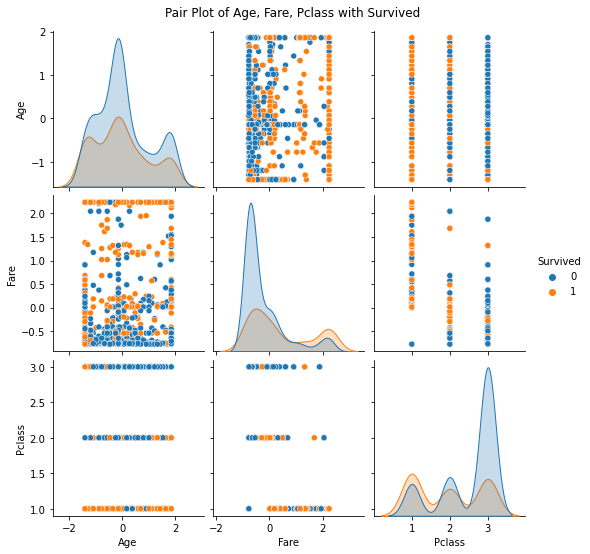

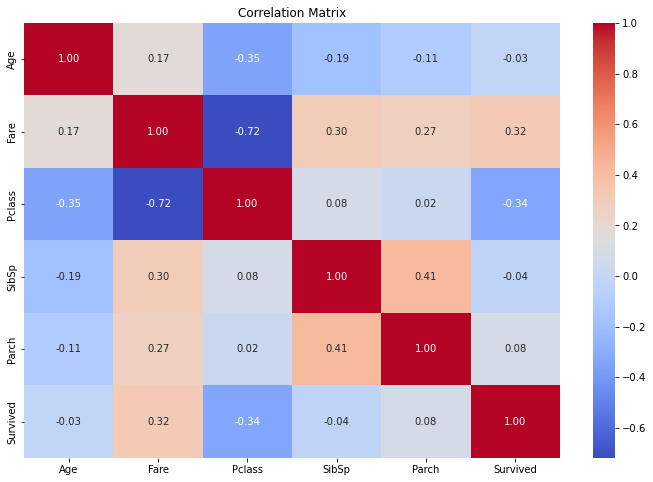

In [73]:
# Multivariate analysis: Pair plot for a few selected features
sns.pairplot(titanic_df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.suptitle('Pair Plot of Age, Fare, Pclass with Survived', y=1.02)
plt.show()

# Multivariate analysis: Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = titanic_df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

6.Apply feature scaling technique on suitable attribute.


In [69]:

print(titanic_df[['Age', 'Fare']].head())


    Age     Fare
0  22.0   7.5500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [70]:
from sklearn.preprocessing import StandardScaler  # Standardization

# Initialize the scaler
scale = StandardScaler()

# Apply the scaler to the 'Age' and 'Fare' columns
titanic_df[['Age', 'Fare']] = scale.fit_transform(titanic_df[['Age', 'Fare']])

print(titanic_df[['Age', 'Fare']].head())


        Age      Fare
0 -0.776123 -0.774448
1  0.911168  1.952669
2 -0.354300 -0.758401
3  0.594801  1.174615
4  0.594801 -0.753053


7. Split the dataset in the ratio of 80:20

In [71]:
from sklearn.model_selection import train_test_split

In [52]:

feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = titanic_df_encoded[feature_cols] 
y = titanic_df_encoded['Survived']    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(X_test.shape)

(712, 8)
(179, 8)
